### Part 1 (Tool: Google Colab)

Install nsepy

In [0]:
!pip install nsepy

importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nsepy
from datetime import date

Downloading data

In [0]:
infy_df = nsepy.get_history(symbol='INFY',
                    start=date(2015,1,1), 
                    end=date(2015,12,31))

In [0]:
print(type(infy_df),'\n', infy_df.shape)

<class 'pandas.core.frame.DataFrame'> 
 (248, 14)


In [0]:
infy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 14 columns):
Symbol                248 non-null object
Series                248 non-null object
Prev Close            248 non-null float64
Open                  248 non-null float64
High                  248 non-null float64
Low                   248 non-null float64
Last                  248 non-null float64
Close                 248 non-null float64
VWAP                  248 non-null float64
Volume                248 non-null int64
Turnover              248 non-null float64
Trades                248 non-null int64
Deliverable Volume    248 non-null int64
%Deliverble           248 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 29.1+ KB


In [0]:
infy_df.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920
2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004
2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702
2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295


Converting index to datetimeIndex

In [0]:
infy_df.index = pd.to_datetime(infy_df.index)
print(type(infy_df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


#### Part 1.1

In [0]:
def week_mov_avg(dataframe, week = 1):
  infy_week = pd.DataFrame()
  infy_week['Close'] = dataframe['Close'].resample('W').mean()
  infy_week['Close'] = infy_week['Close'].rolling(window = week).mean()
  infy_week['Close_backfilled'] = infy_week['Close'].fillna(method='backfill')
  return infy_week


In [0]:
week_avg = pd.DataFrame(week_mov_avg(infy_df, 4))
print(week_avg.head(5))

                  Close  Close_backfilled
Date                                     
2015-01-04          NaN       2066.235000
2015-01-11          NaN       2066.235000
2015-01-18          NaN       2066.235000
2015-01-25  2066.235000       2066.235000
2015-02-01  2103.313125       2103.313125


#### Part 1.2

In [0]:
def day_mov_avg(dataframe, days = 1):
  infy_day = pd.DataFrame()
  infy_day['Close'] = dataframe['Close'].asfreq('D', method ='pad')
  infy_day['Close'] = infy_day['Close'].rolling(window = days).mean()
  infy_day['Close_backfilled'] = infy_day['Close'].fillna(method='backfill')
  return infy_day

In [0]:
day_avg_10 = pd.DataFrame(day_mov_avg(infy_df, 10))
print(day_avg_10.head(15))

               Close  Close_backfilled
Date                                  
2015-01-01       NaN          2005.000
2015-01-02       NaN          2005.000
2015-01-03       NaN          2005.000
2015-01-04       NaN          2005.000
2015-01-05       NaN          2005.000
2015-01-06       NaN          2005.000
2015-01-07       NaN          2005.000
2015-01-08       NaN          2005.000
2015-01-09       NaN          2005.000
2015-01-10  2005.000          2005.000
2015-01-11  2015.005          2015.005
2015-01-12  2025.280          2025.280
2015-01-13  2032.850          2032.850
2015-01-14  2044.395          2044.395
2015-01-15  2058.230          2058.230


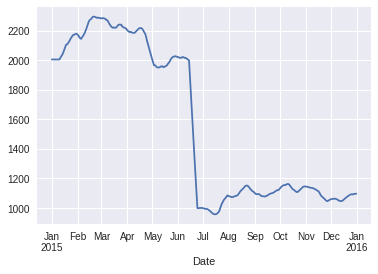

In [0]:
day_avg_10['Close_backfilled'].plot()

In [0]:
day_avg_75 = pd.DataFrame(day_mov_avg(infy_df, 75))
print(day_avg_75)

                  Close  Close_backfilled
Date                                     
2015-01-01          NaN       2188.290667
2015-01-02          NaN       2188.290667
2015-01-03          NaN       2188.290667
2015-01-04          NaN       2188.290667
2015-01-05          NaN       2188.290667
2015-01-06          NaN       2188.290667
2015-01-07          NaN       2188.290667
2015-01-08          NaN       2188.290667
2015-01-09          NaN       2188.290667
2015-01-10          NaN       2188.290667
2015-01-11          NaN       2188.290667
2015-01-12          NaN       2188.290667
2015-01-13          NaN       2188.290667
2015-01-14          NaN       2188.290667
2015-01-15          NaN       2188.290667
2015-01-16          NaN       2188.290667
2015-01-17          NaN       2188.290667
2015-01-18          NaN       2188.290667
2015-01-19          NaN       2188.290667
2015-01-20          NaN       2188.290667
2015-01-21          NaN       2188.290667
2015-01-22          NaN       2188

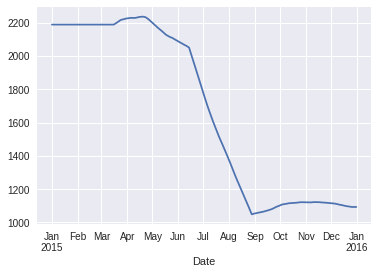

In [0]:
day_avg_75['Close_backfilled'].plot()

#### Part 1.3.1

In [0]:
infy = pd.DataFrame(infy_df[['Volume','Close']])

infy['Vol_1'] = infy_df['Volume'].shift(1)
infy['vol_percent'] = ((infy['Volume'] - infy['Vol_1'])/(infy['Volume'] ))*100 
infy['vol_shock'] = (abs(infy[['vol_percent']]) > 10).astype(int)
infy['vol_shock_direction'] = (infy[['vol_percent']] > 10).astype(int)

print(infy.head(5))

             Volume    Close      Vol_1  vol_percent  vol_shock  \
Date                                                              
2015-01-01   500691  1974.40        NaN          NaN          0   
2015-01-02  1694580  2013.20   500691.0    70.453387          1   
2015-01-05  2484256  1995.90  1694580.0    31.787223          1   
2015-01-06  2416829  1954.20  2484256.0    -2.789895          0   
2015-01-07  1812479  1963.55  2416829.0   -33.343835          1   

            vol_shock_direction  
Date                             
2015-01-01                    0  
2015-01-02                    1  
2015-01-05                    1  
2015-01-06                    0  
2015-01-07                    0  


#### Part 1.3.2 & 1.3.3

In [0]:
infy['Close_1'] = infy['Close'].shift(1)
infy['price_percent'] = ((infy['Close'] - infy['Close_1'])/(infy['Close'] ))*100 
infy['price_shock'] = (abs(infy[['price_percent']]) > 2).astype(int)
infy['price_black_swan'] = infy['price_shock']
infy['price_shock_direction'] = (infy[['price_percent']] > 2).astype(int)

print(infy.head(10))

              Volume    Close       Vol_1  vol_percent  vol_shock  \
Date                                                                
2015-01-01    500691  1974.40         NaN          NaN          0   
2015-01-02   1694580  2013.20    500691.0    70.453387          1   
2015-01-05   2484256  1995.90   1694580.0    31.787223          1   
2015-01-06   2416829  1954.20   2484256.0    -2.789895          0   
2015-01-07   1812479  1963.55   2416829.0   -33.343835          1   
2015-01-08   3391230  1973.45   1812479.0    46.553935          1   
2015-01-09  11215832  2074.45   3391230.0    69.763902          1   
2015-01-12   3189722  2115.95  11215832.0  -251.624123          1   
2015-01-13   2200309  2088.90   3189722.0   -44.967002          1   
2015-01-14   2480315  2128.65   2200309.0    11.289131          1   

            vol_shock_direction  Close_1  price_percent  price_shock  \
Date                                                                   
2015-01-01                 

#### Part 1.3.4

In [0]:
infy['price_shock_w/o_vol_shock'] = ((infy['price_shock']==1) & (infy['vol_shock']==0)).astype(int) 
print(infy.head(10))

              Volume    Close       Vol_1  vol_percent  vol_shock  \
Date                                                                
2015-01-01    500691  1974.40         NaN          NaN          0   
2015-01-02   1694580  2013.20    500691.0    70.453387          1   
2015-01-05   2484256  1995.90   1694580.0    31.787223          1   
2015-01-06   2416829  1954.20   2484256.0    -2.789895          0   
2015-01-07   1812479  1963.55   2416829.0   -33.343835          1   
2015-01-08   3391230  1973.45   1812479.0    46.553935          1   
2015-01-09  11215832  2074.45   3391230.0    69.763902          1   
2015-01-12   3189722  2115.95  11215832.0  -251.624123          1   
2015-01-13   2200309  2088.90   3189722.0   -44.967002          1   
2015-01-14   2480315  2128.65   2200309.0    11.289131          1   

            vol_shock_direction  Close_1  price_percent  price_shock  \
Date                                                                   
2015-01-01                 

### Part 2

In [0]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.palettes import Blues9
from bokeh.palettes import RdBu3
from bokeh.models import ColumnDataSource, CategoricalColorMapper, ContinuousColorMapper, LinearColorMapper
from bokeh.palettes import Spectral11
from bokeh.io import curdoc
output_notebook()
from bokeh.transform import linear_cmap

Loading BokehJS ...

#### Part 2.1&2

In [0]:
p = figure(plot_width=800, title = 'time series for INFY',plot_height=250, x_axis_type="datetime")
p.line(infy.index, infy['Close'], color='blue', alpha=0.5)
show(p)
output_file("A.html")

#### Part 2.3

In [0]:
color = {0:'blue',1:'red'}
colors = [color[x] for x in infy['vol_shock']] 

p = figure(plot_width=800, plot_height=250, title = 'timeseries between two volume shocks in a different color', x_axis_type="datetime")
p.circle(infy.index, infy['Close'], color=colors, alpha=0.5)
show(p)
output_file("B.html")

#### Part 2.4

In [0]:
week_avg_52 = pd.DataFrame(week_mov_avg(infy_df,52))
week_avg_52

,Close,Close_backfilled
Date,,
2015-01-04,NaN,1562.498125
2015-01-11,NaN,1562.498125
2015-01-18,NaN,1562.498125
2015-01-25,NaN,1562.498125
2015-02-01,NaN,1562.498125
2015-02-08,NaN,1562.498125
2015-02-15,NaN,1562.498125
2015-02-22,NaN,1562.498125
2015-03-01,NaN,1562.498125


In [0]:
data_source = ColumnDataSource({'x':week_avg_52.index,'y':week_avg_52['Close_backfilled']})
color_mapper = LinearColorMapper(palette='Blues8', low=min(week_avg_52['Close_backfilled']), high=max(week_avg_52['Close_backfilled']))

p = figure(plot_width=800, plot_height=250,title = 'Gradient color in blue spectrum based on difference of 52 week moving average', x_axis_type="datetime")
p.scatter(week_avg_52.index,week_avg_52['Close_backfilled'],color={'field': 'y', 'transform': color_mapper})
show(p)
output_file("C.html")

#### Part 2.5

In [0]:
p = figure(plot_width=800, plot_height=250,title='closing Pricing shock without volume shock to identify volumeless price movement', x_axis_type="datetime")
p.circle(infy.index, infy['Close']*infy['price_shock_w/o_vol_shock'])
show(p)
output_file("D.html")

#### Part 2.6

In [0]:
from statsmodels.tsa.stattools import pacf

lags = 100
x = list(range(lags))
p = figure(plot_height=200, title='partial autocorrelation plot for each stock/index')
partial_autocorr = pacf(infy["Close"], nlags=lags)
p.vbar(x=x, top=partial_autocorr, width=0.9)
show(p)
output_file("E.html")

In [0]:
from google.colab import files
files.download("E.html")